In [2]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


# install YOLOv8

In [1]:
pip install ultralytics

In [2]:
from ultralytics import YOLO
import os
from IPython.display import display,Image
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.42  Python-3.11.5 torch-2.2.2+cpu CPU (13th Gen Intel Core(TM) i7-1355U)
Setup complete  (12 CPUs, 15.7 GB RAM, 209.1/257.4 GB disk)


# Train YOLOv8 model on custom Datast

In [3]:
# #run only once
#!pip install roboflow

#data importing code

In [4]:
import torch
print(torch.cuda.is_available())

False


In [10]:
!yolo task=detect mode=train model=yolov8m.pt data=C:/Users/Sumant/Desktop/cvdl/Car-detection-1/data.yaml epochs=20 imgsz=640

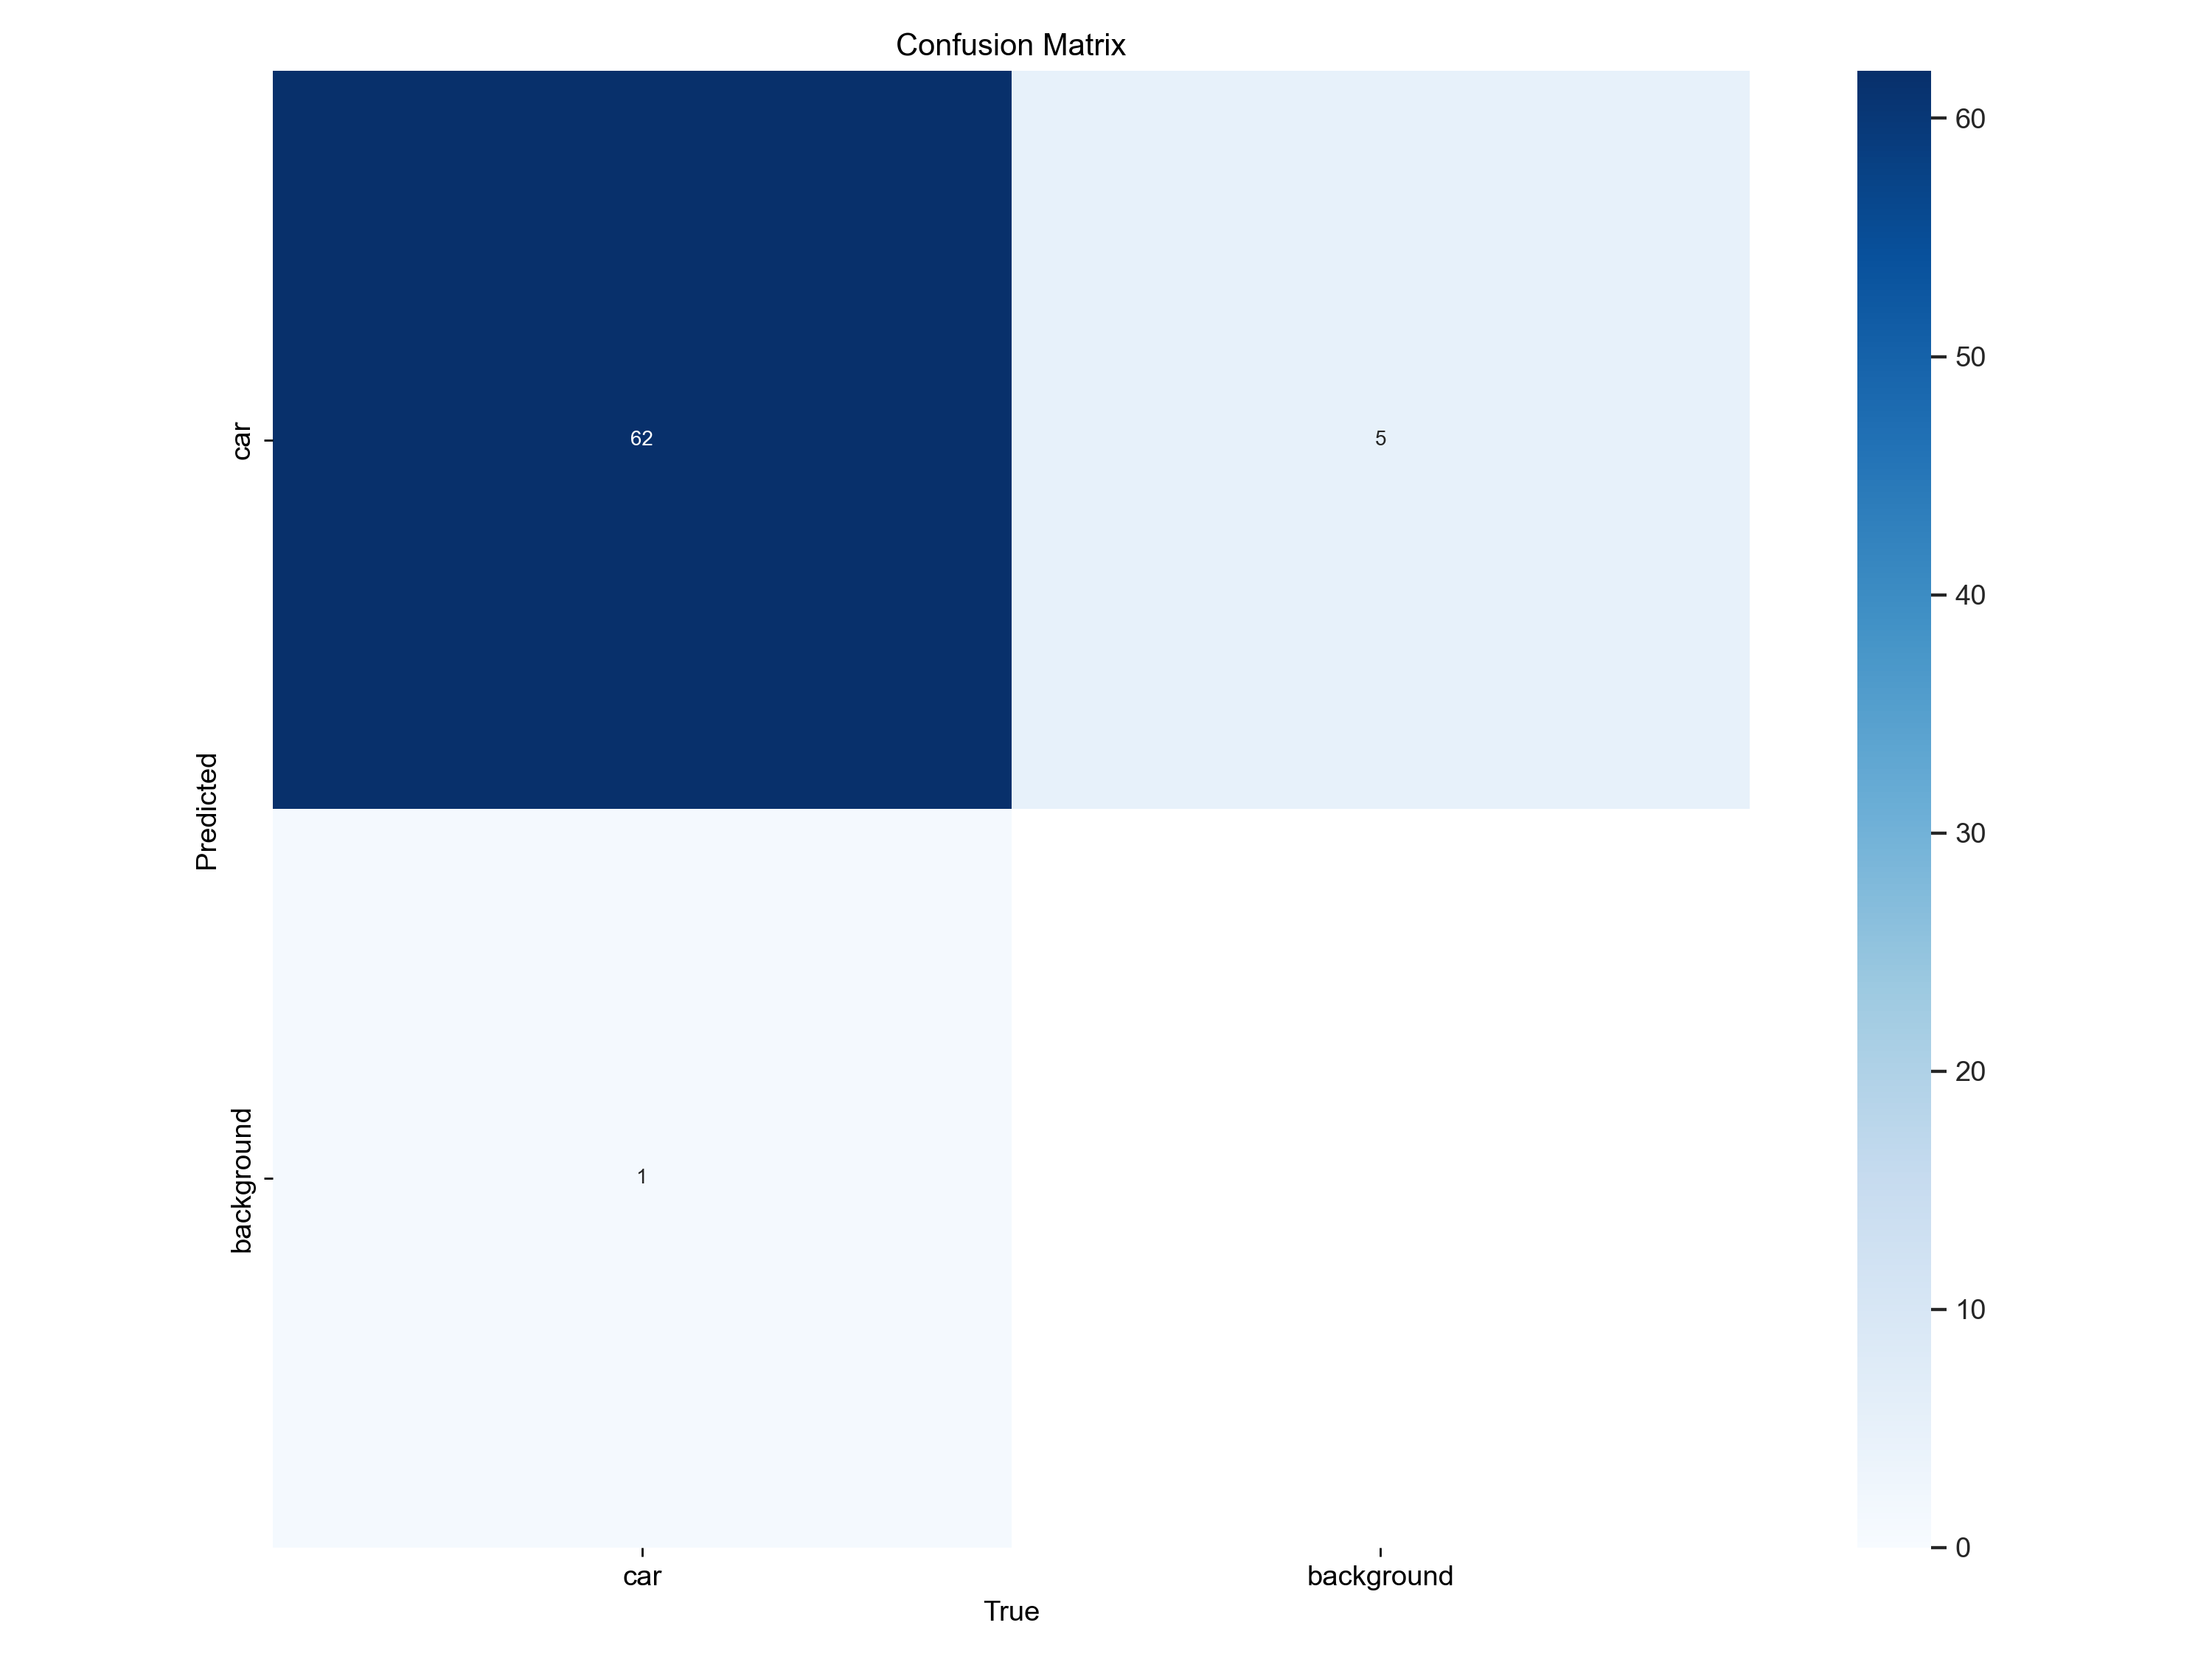

In [15]:
Image(filename=f'C:/Users/RUTURAJ/Desktop/cvdl/runs/detect/train/confusion_matrix.png',width=600)

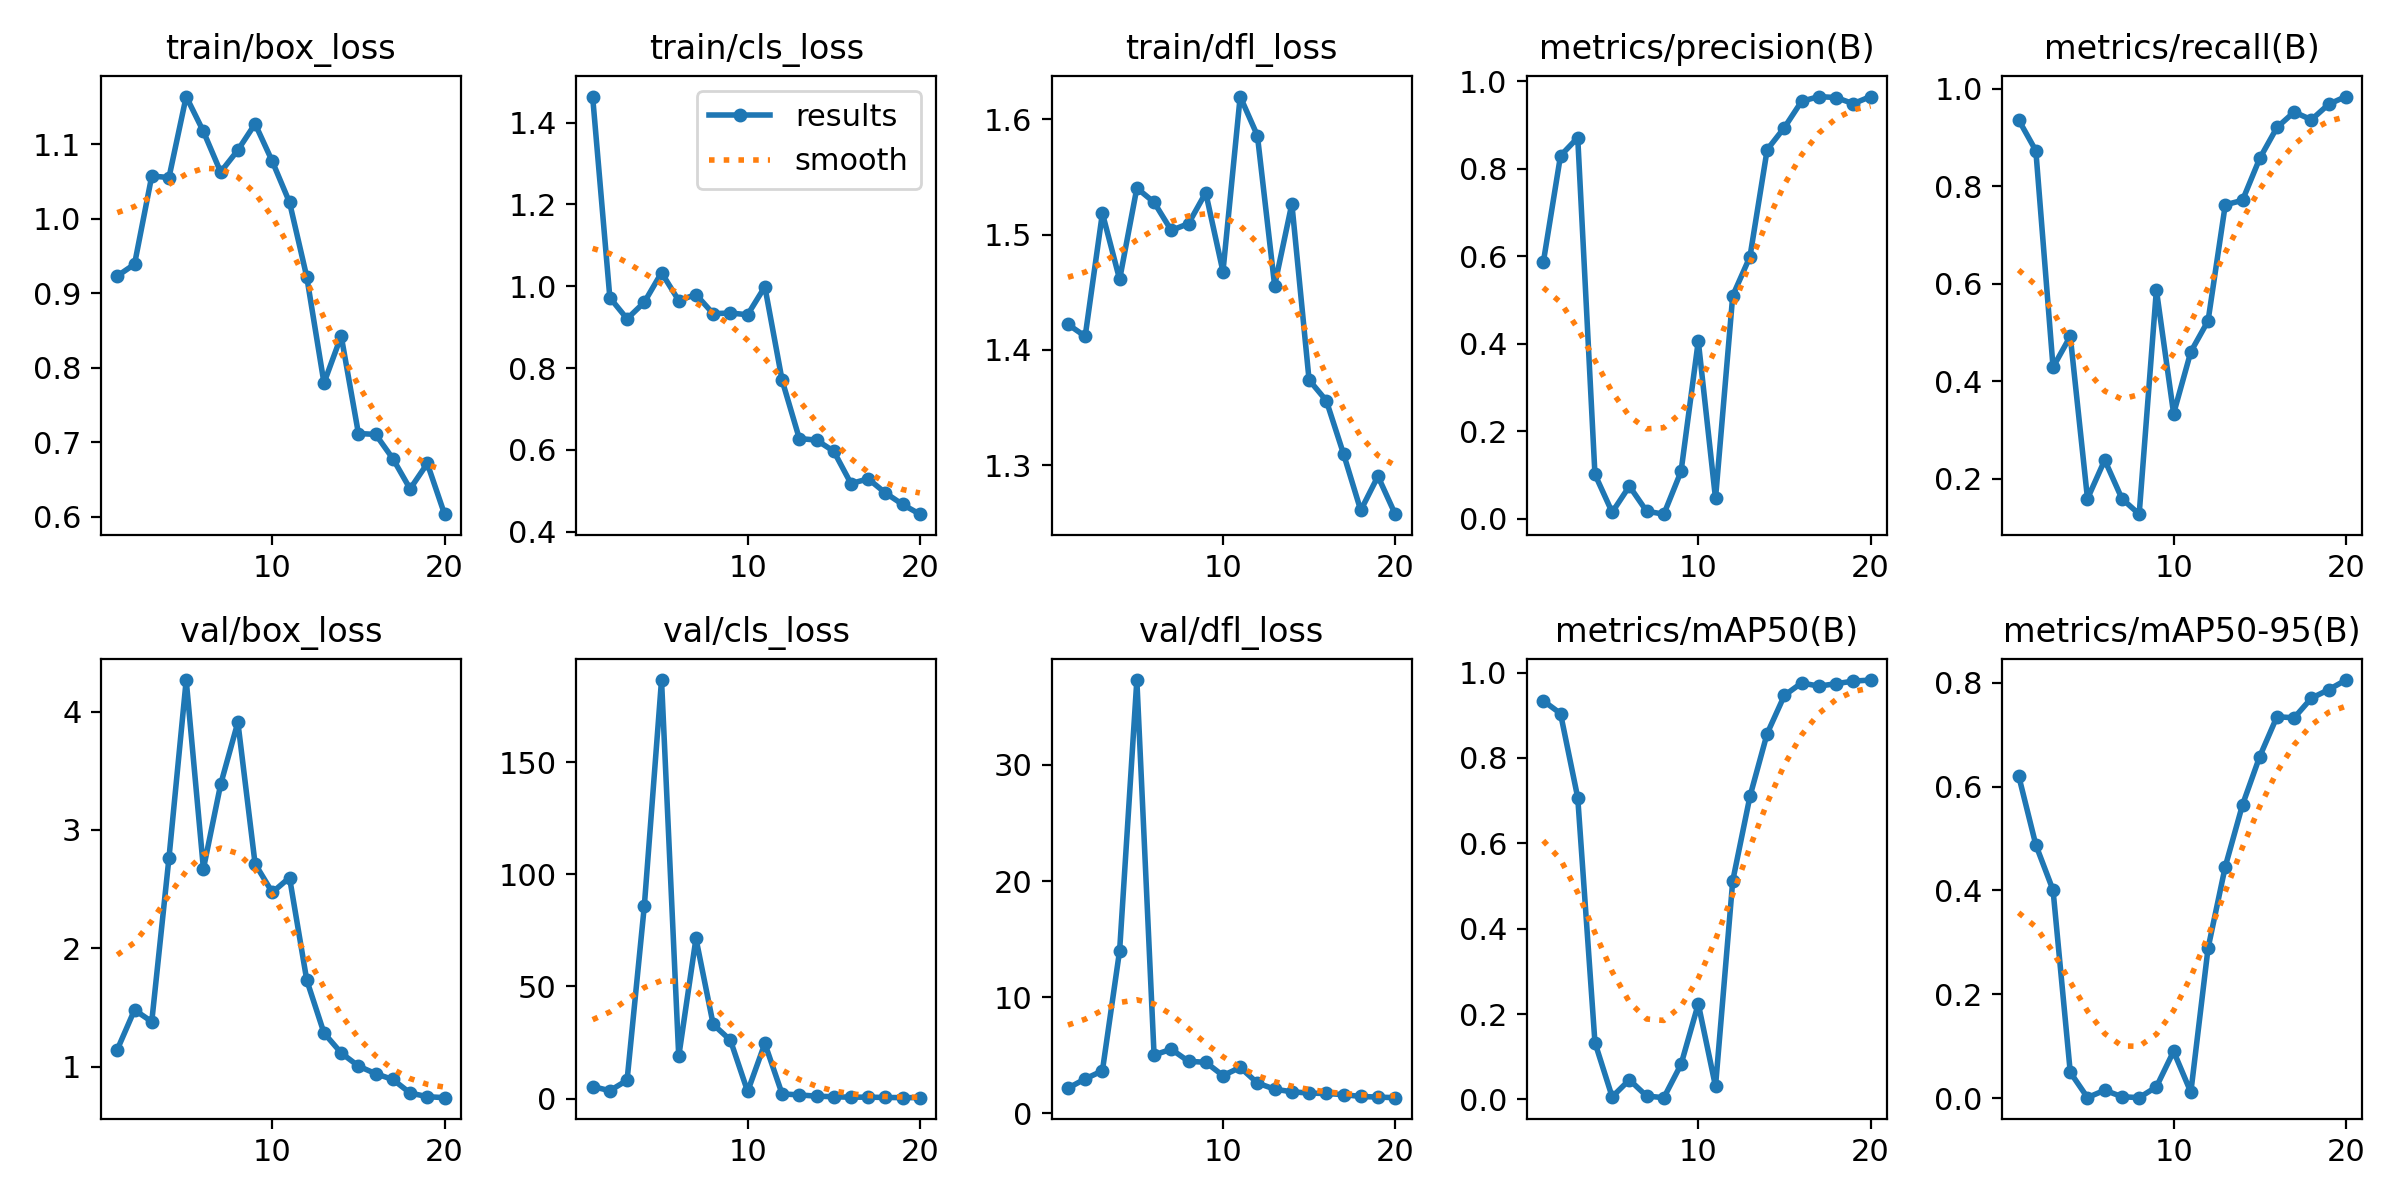

In [16]:
Image(filename=f'C:/Users/RUTURAJ/Desktop/cvdl/runs/detect/train/results.png',width=600)

In [18]:
!yolo task=detect mode=val model=C:/Users/RUTURAJ/Desktop/cvdl/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196  Python-3.11.2 torch-2.2.0+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

val: Scanning C:\Users\RUTURAJ\Desktop\cvdl\Car-detection-1\valid\labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
val: Scanning C:\Users\RUTURAJ\Desktop\cvdl\Car-detection-1\valid\labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
WARNING  Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 63. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  25%|██▌     

In [19]:
!yolo task=detect mode=predict model=C:/Users/RUTURAJ/Desktop/cvdl/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images

Ultralytics YOLOv8.0.196  Python-3.11.2 torch-2.2.0+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/31 c:\Users\RUTURAJ\Desktop\cvdl\Car-detection-1\test\images\1043_jpg.rf.4ddc2fe7389a7c9afe0837945513901e.jpg: 640x640 1 car, 369.1ms
image 2/31 c:\Users\RUTURAJ\Desktop\cvdl\Car-detection-1\test\images\1064_jpg.rf.a1d948c8739ccb02bed51da9d2e4b14b.jpg: 640x640 1 car, 338.1ms
image 3/31 c:\Users\RUTURAJ\Desktop\cvdl\Car-detection-1\test\images\109_jpg.rf.db7f1580bfadbb66cfa63d1e57db7b69.jpg: 640x640 1 car, 321.1ms
image 4/31 c:\Users\RUTURAJ\Desktop\cvdl\Car-detection-1\test\images\1107_jpg.rf.100bec2993c74e63d7996e25d1609987.jpg: 640x640 1 car, 293.1ms
image 5/31 c:\Users\RUTURAJ\Desktop\cvdl\Car-detection-1\test\images\1220_jpg.rf.079ddc64b58af5ae3d0c4677a93dd42c.jpg: 640x640 1 car, 283.1ms
image 6/31 c:\Users\RUTURAJ\Desktop\cvdl\Car-detection-1\test\images\1228_jpg.rf.92224035e2625364083ae5be817

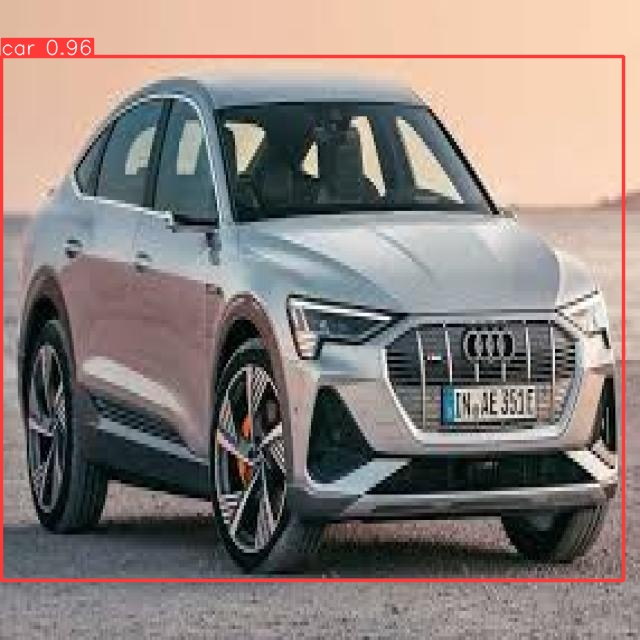

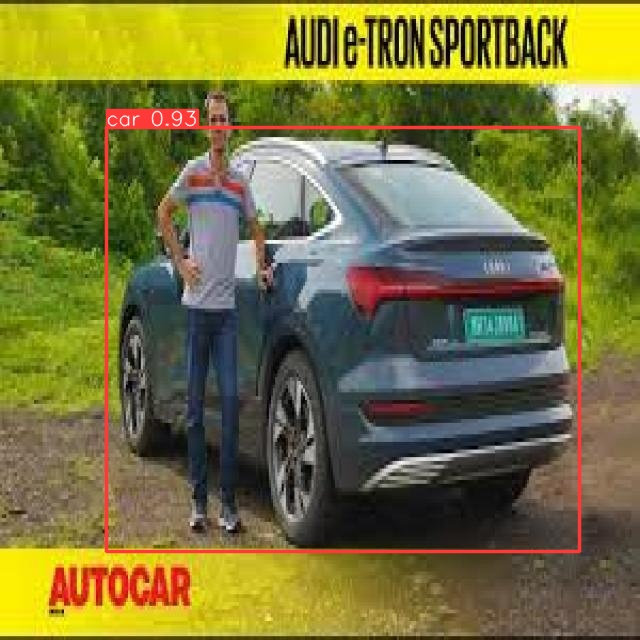

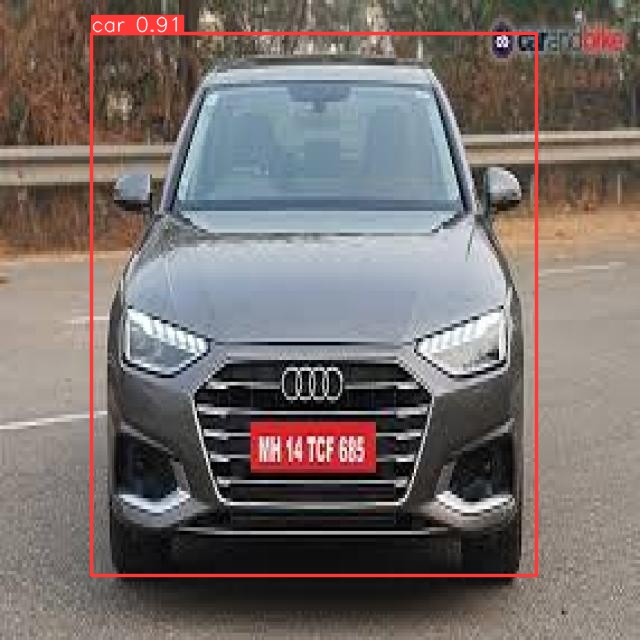

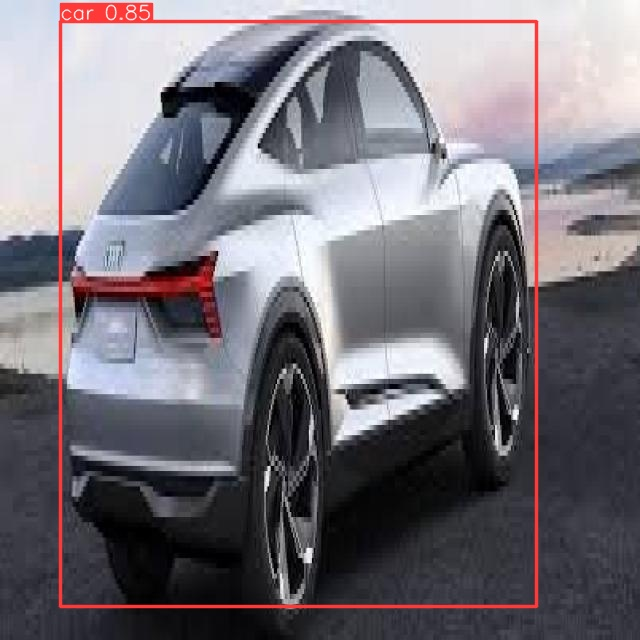

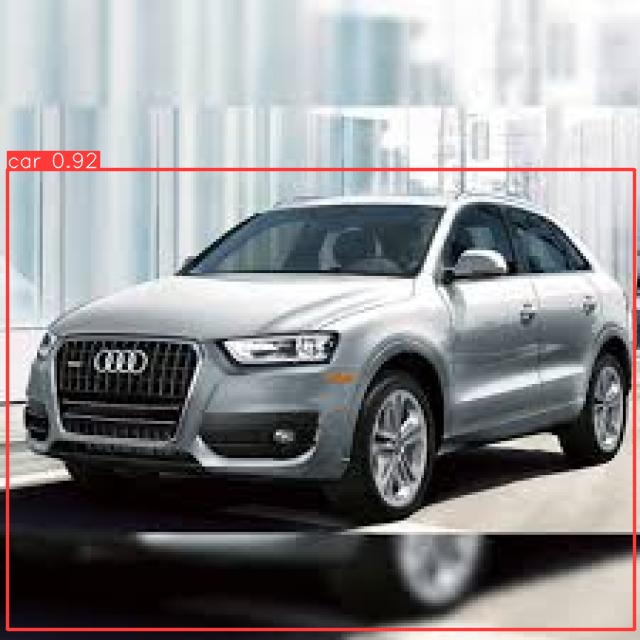

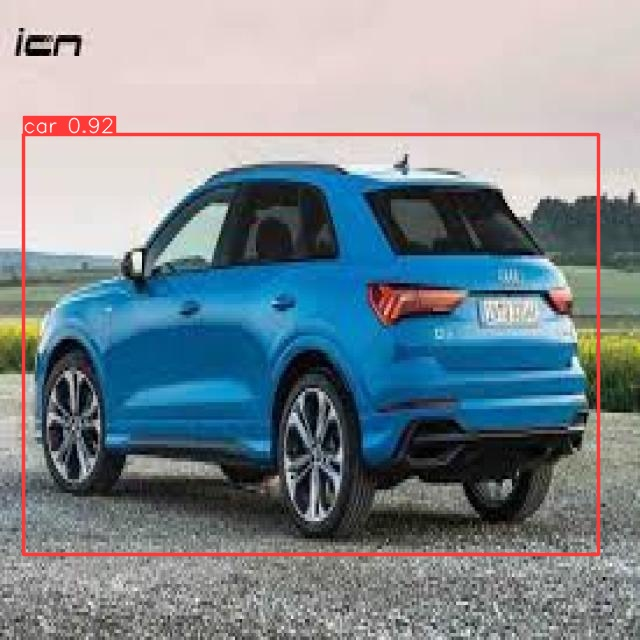

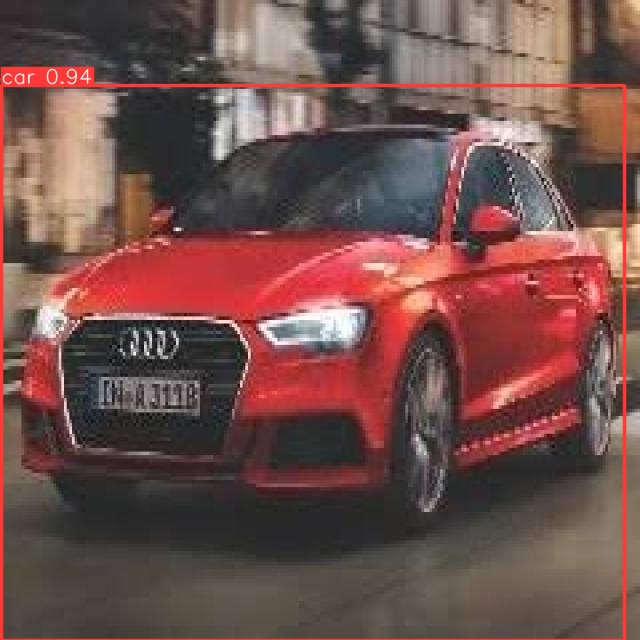

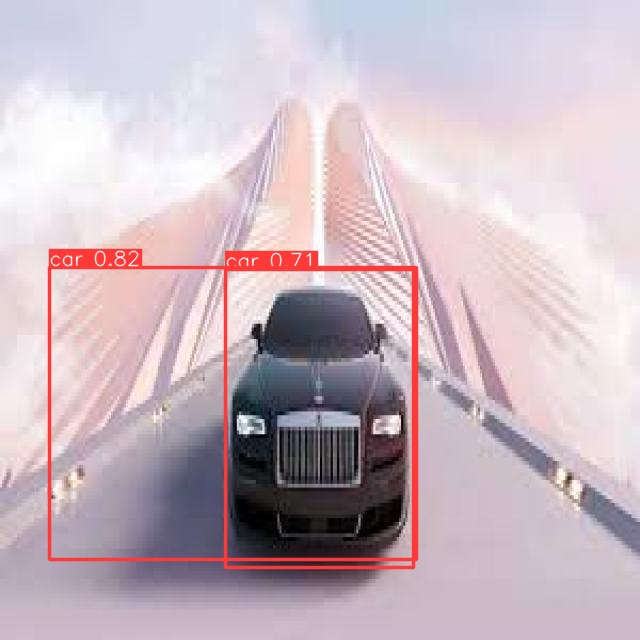

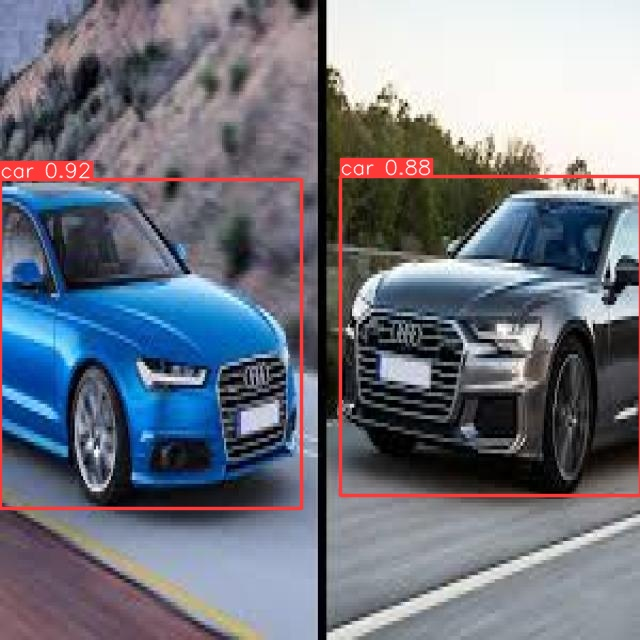

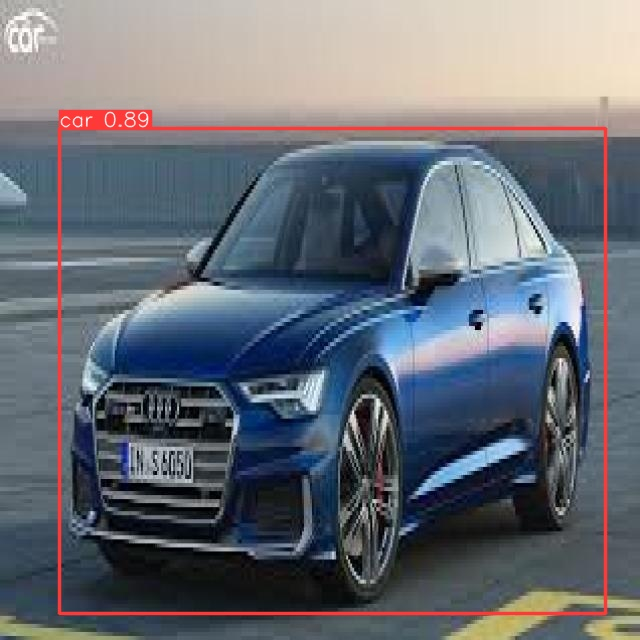

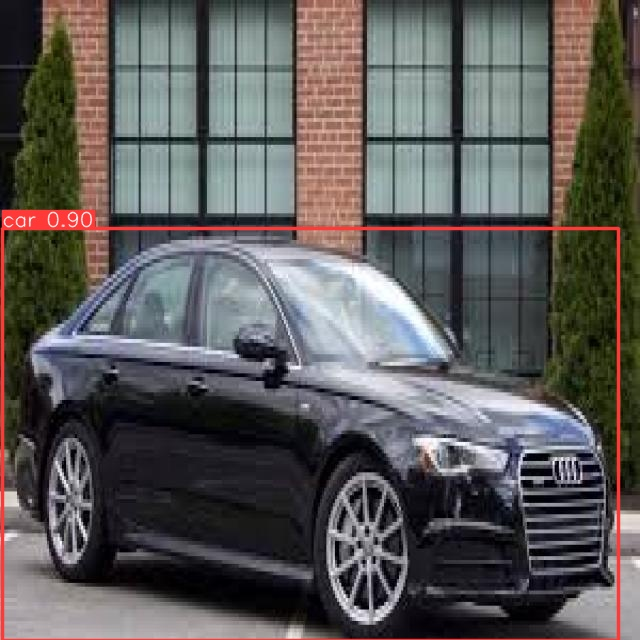

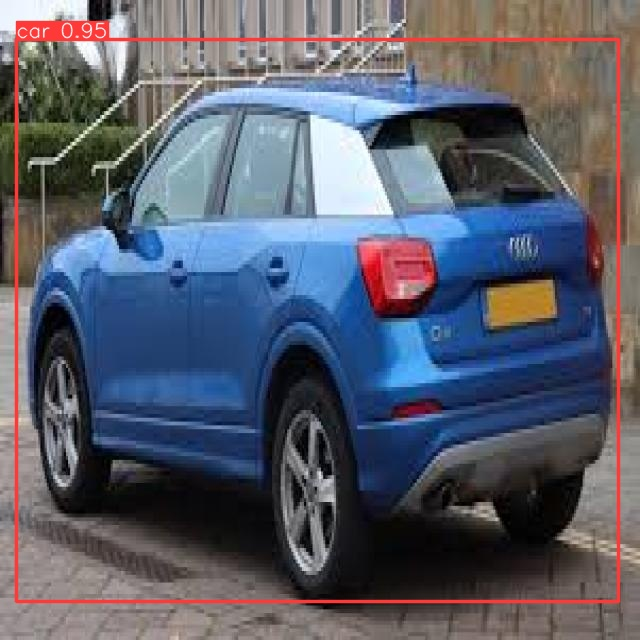

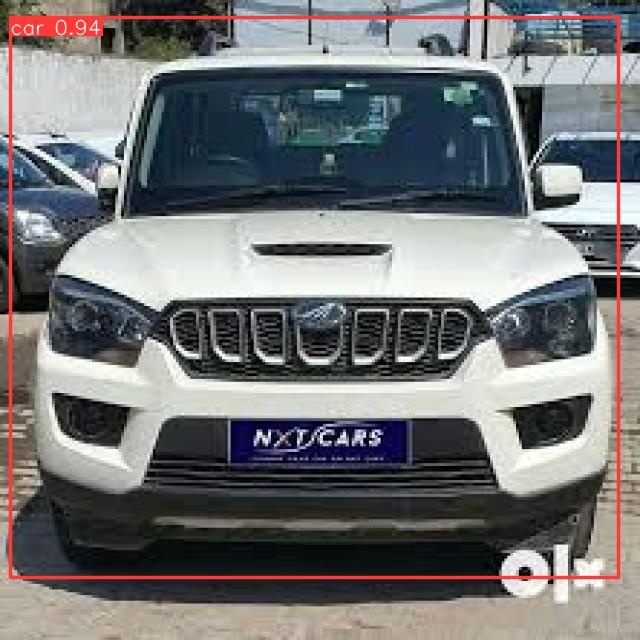

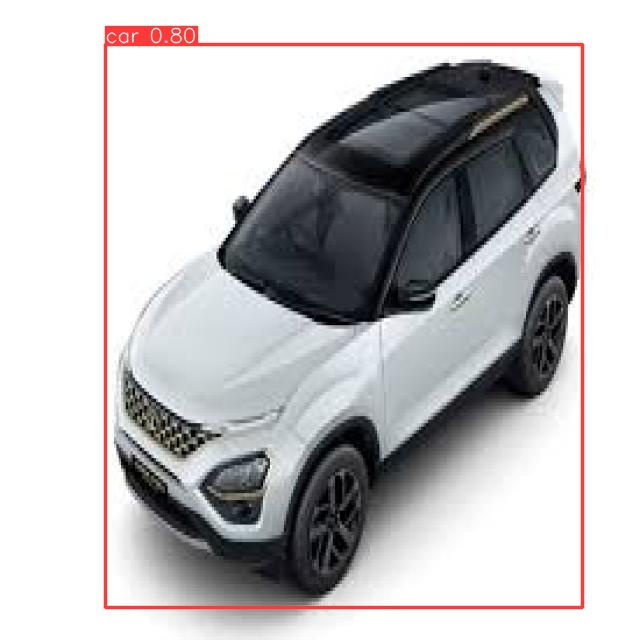

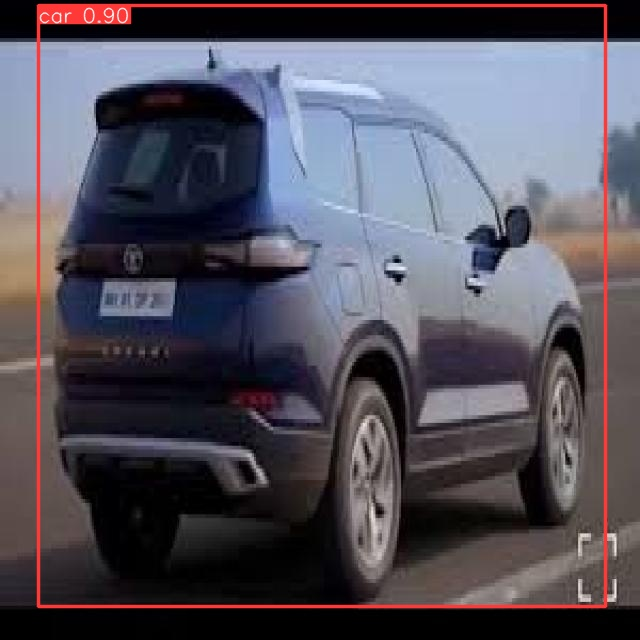

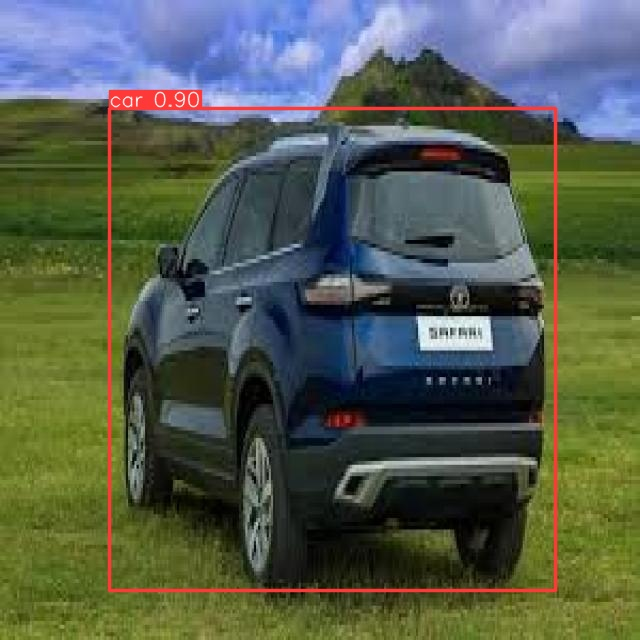

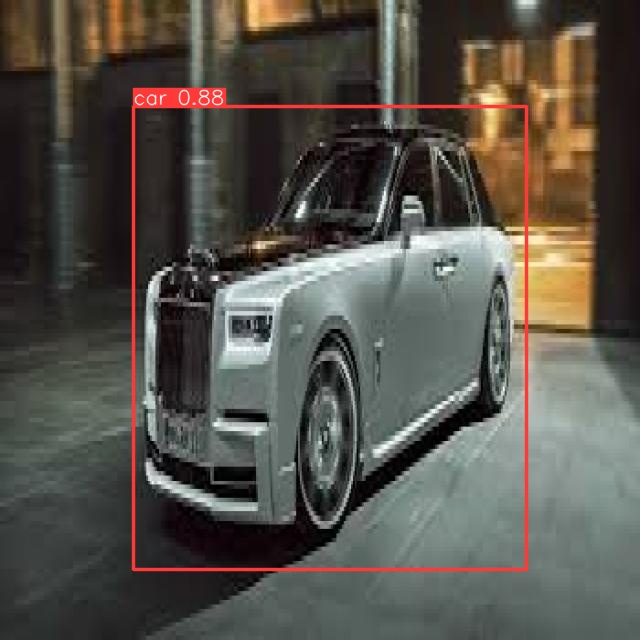

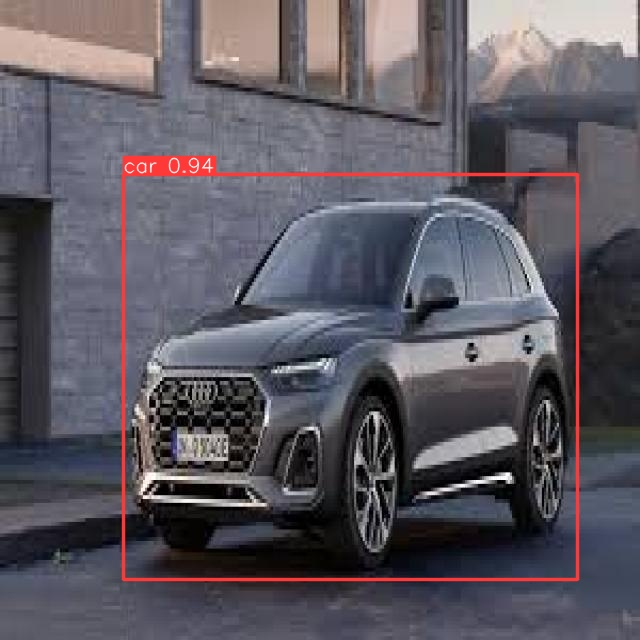

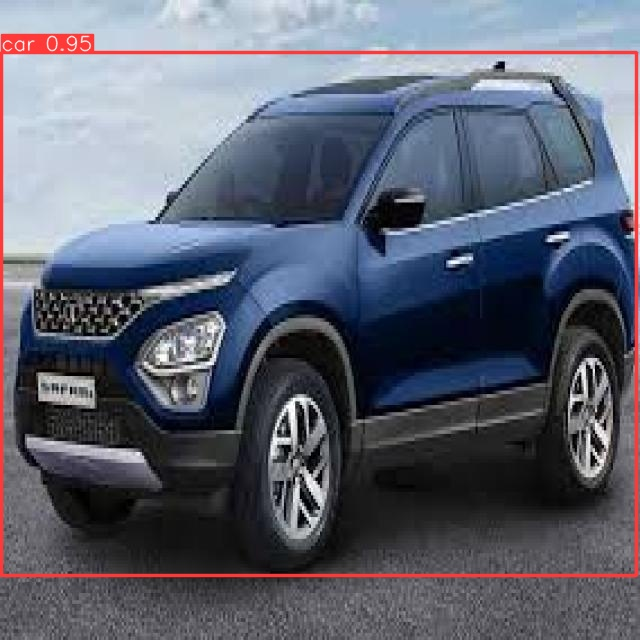

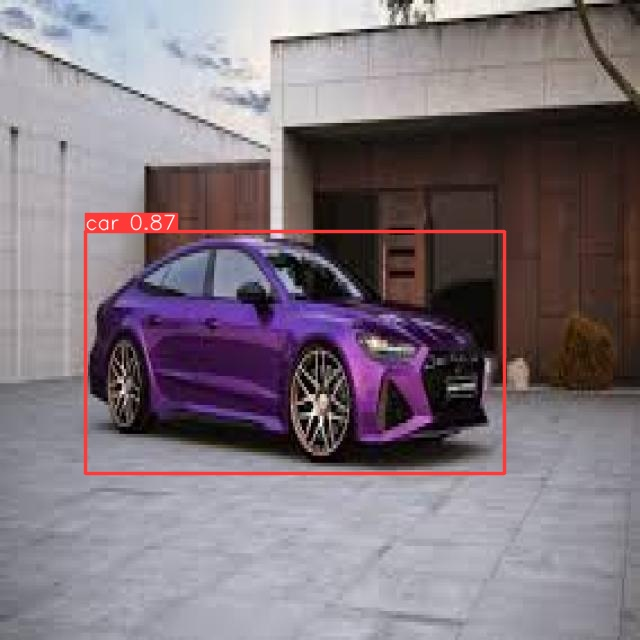

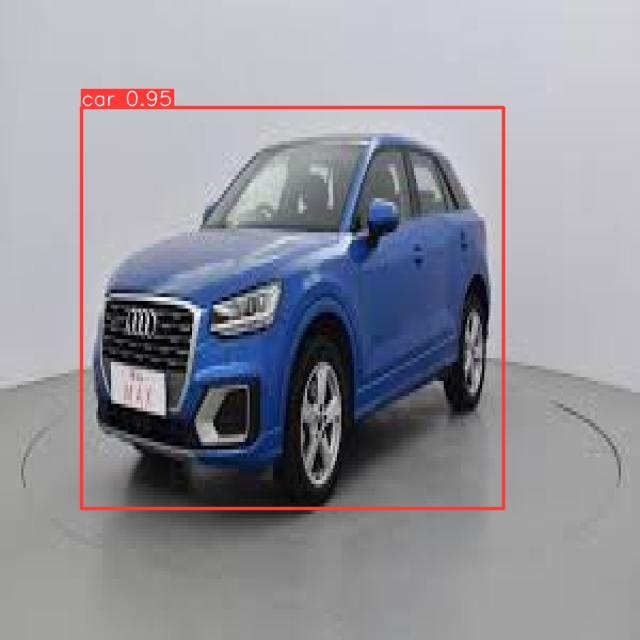

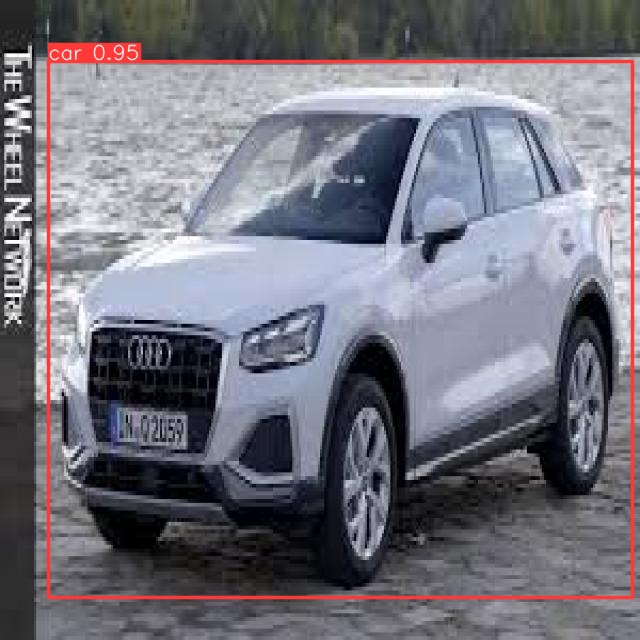

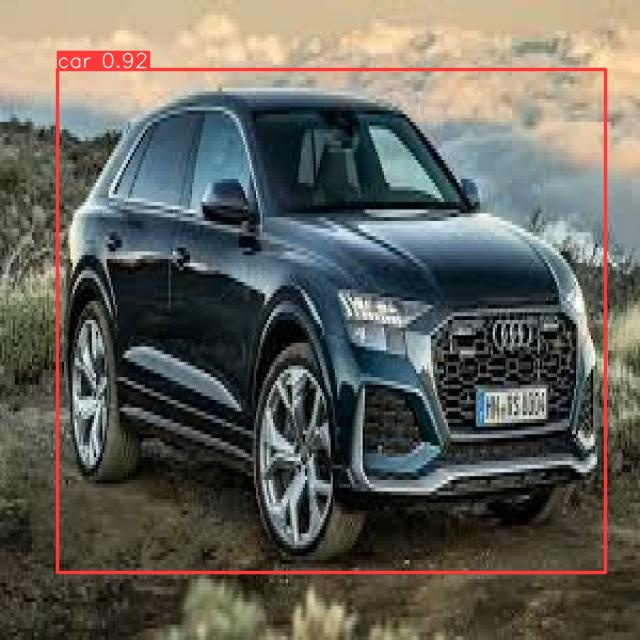

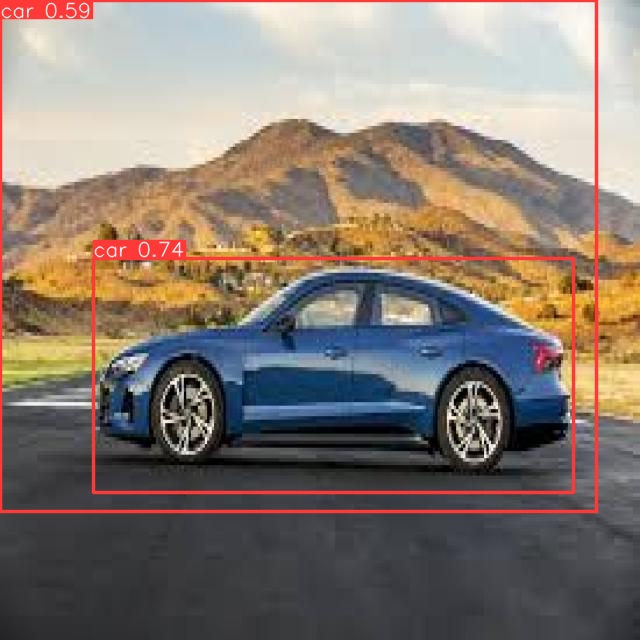

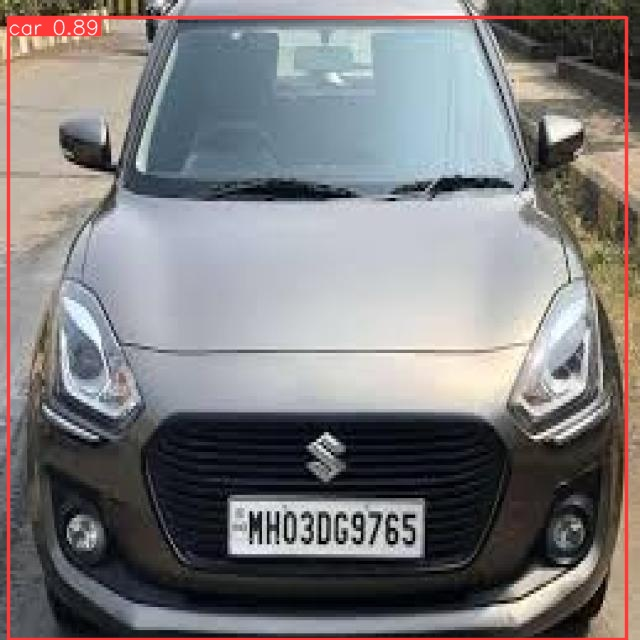

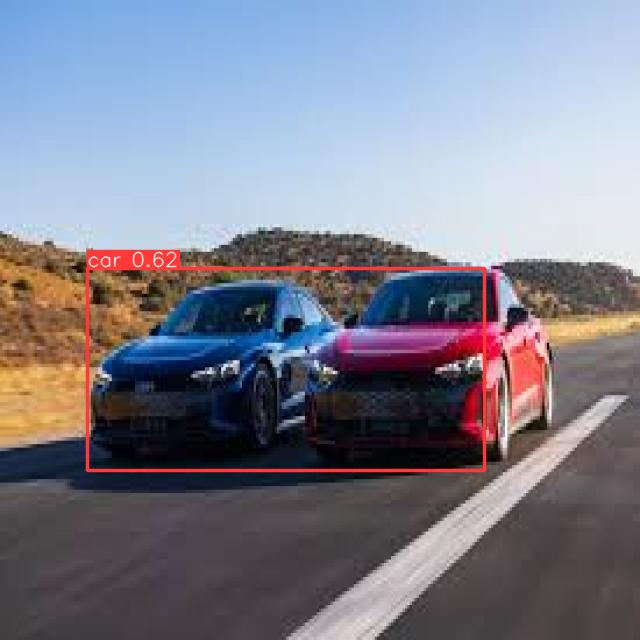

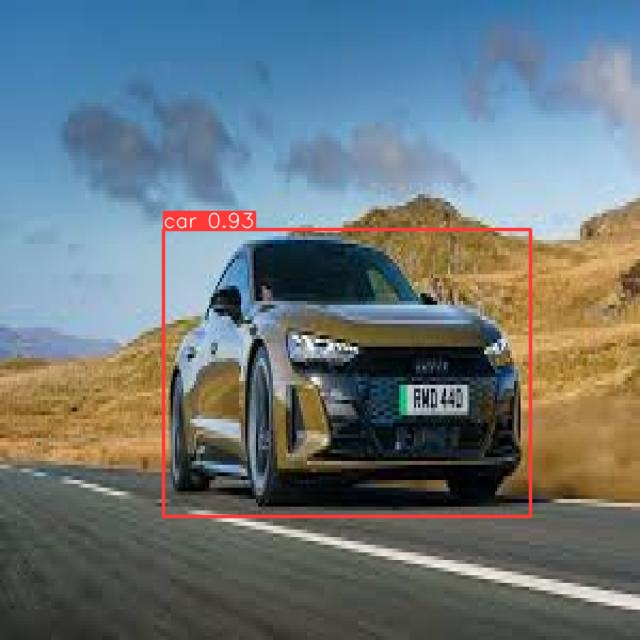

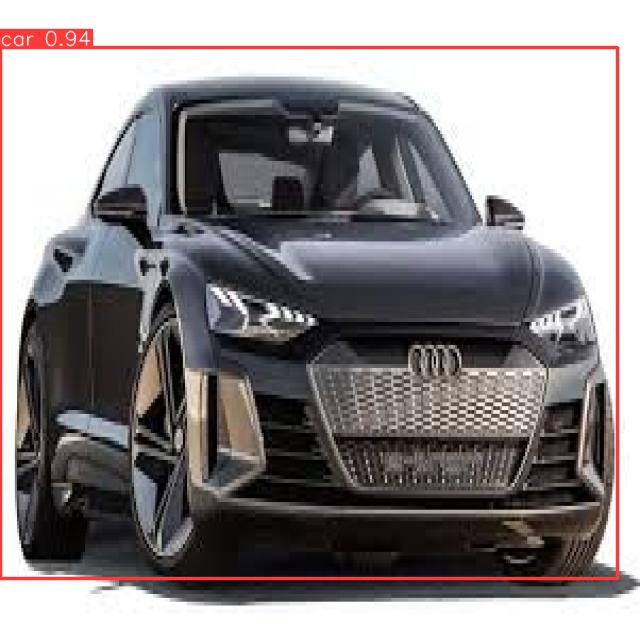

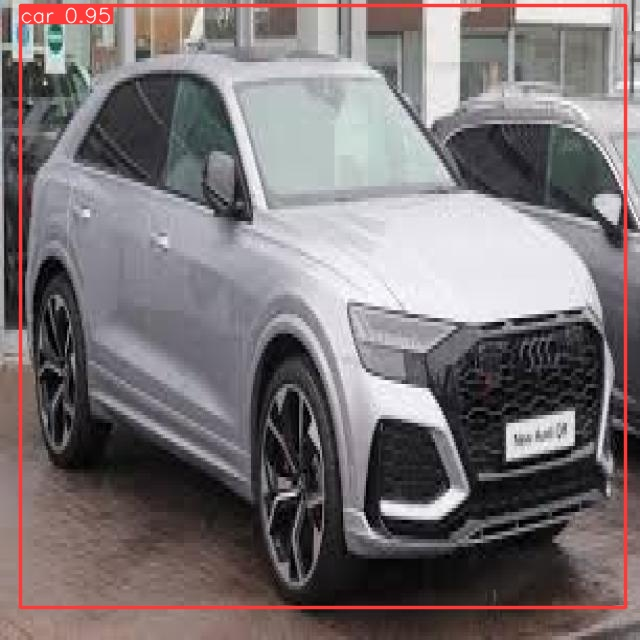

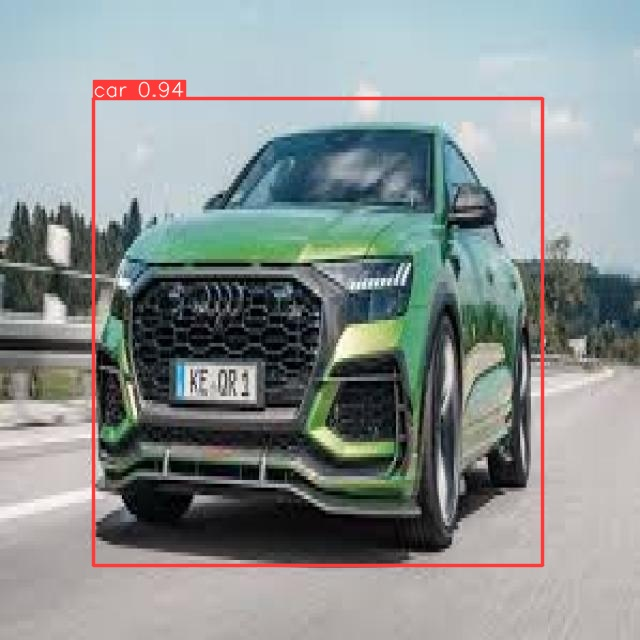

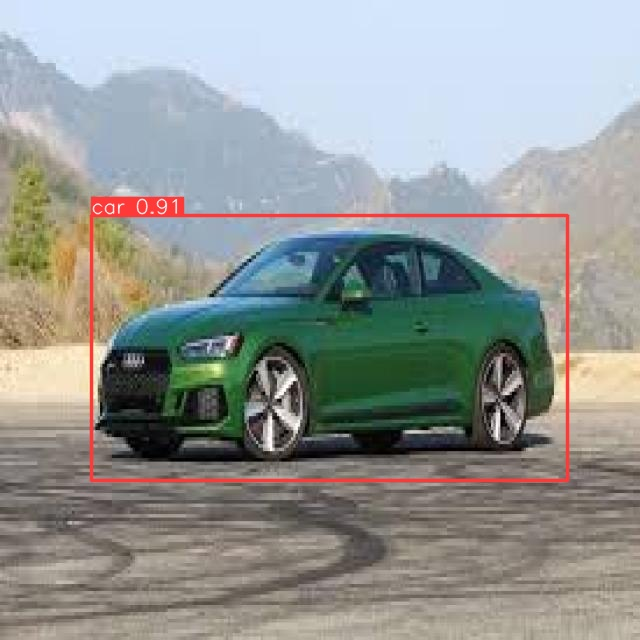

In [20]:
import glob
from IPython.display import Image , display

for image_path in glob.glob(f'C:/Users/RUTURAJ/Desktop/cvdl/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")

# deploy model to perform predictions on roboflow api

In [21]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"C:/Users/RUTURAJ/Desktop/cvdl/runs/detect/train/")

Dependency ultralytics<=8.0.20 is required but found version=8.0.196, to fix: `pip install ultralytics<=8.0.20`
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


sample test


0: 352x640 1 car, 185.0ms
Speed: 2.0ms preprocess, 185.0ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)


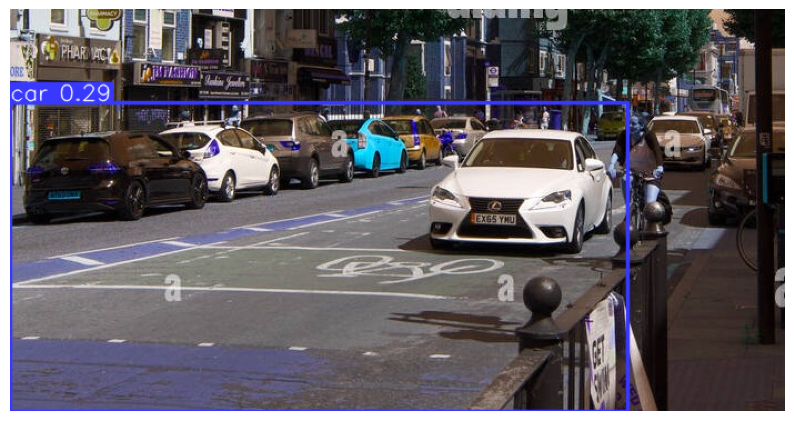

In [10]:
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load the YOLO model
model = YOLO('C:/Users/RUTURAJ/Desktop/cvdl/runs/detect/train/weights/best.pt')

# Path to the image
image_path = "car4.jpg"

# Load the image
image = Image.open(image_path)

# Perform object detection
results = model.predict(image)

# Draw bounding boxes on the original image
annotated_image = image.copy()
for detected_obj in results[0]:
    annotated_image = detected_obj.plot()  # Draw bounding box on the image

# Display the annotated image
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.axis('off')
plt.show()

